# Tweet Analytics
### Group ID: Group035
### Members
1. Ananta Patil
2. Mahesh Mehendale
3. Harsh Ajit Khajgiwale

In [1]:
!pip install pymongo
!pip install matplotlib
!pip intall pandas
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
ERROR: unknown command "intall" - maybe you meant "install"
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
from pymongo import MongoClient
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#Connecting to MonogDB
client = MongoClient("mongodb://localhost:27017/")

In [4]:
#Database name => IrGroup10
mydatabase = client["IrGroup10"]

In [5]:
#Selecting collection => consumer_data
mycollection = mydatabase["consumer_data"]

In [6]:
#Total records in consumer_data
mycollection.count()

<ipython-input-6-b253b998c5ee>:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  mycollection.count()


21266

In [7]:
cursor = mycollection.find()

In [8]:
tweets_feed = {}
for record in cursor:
    convertedDict = json.loads(record['tweets'])
    tweets_feed[convertedDict['tweet_id']] = []
    tweets_feed[convertedDict['tweet_id']].append(convertedDict['user_id'])
    tweets_feed[convertedDict['tweet_id']].append(convertedDict['user_name'])
    tweets_feed[convertedDict['tweet_id']].append(convertedDict['user_screen_name'])
    tweets_feed[convertedDict['tweet_id']].append(convertedDict['user_followers_count'])
    tweets_feed[convertedDict['tweet_id']].append(convertedDict['user_location'])
    tweets_feed[convertedDict['tweet_id']].append(convertedDict['tweet_text'])
    tweets_feed[convertedDict['tweet_id']].append(convertedDict['tweet_lang'])
    

In [9]:
df = pd.DataFrame.from_dict(tweets_feed)

In [10]:
df = df.transpose()

In [11]:
df.columns=['user_id','user_name','user_screen_name','user_followers_count','user_location','tweet_text','tweet_lang']

In [12]:
df.index.name= 'tweet_id'

In [13]:
df.head()

,user_id,user_name,user_screen_name,user_followers_count,user_location,tweet_text,tweet_lang
tweet_id,,,,,,,
1433450460833275915,1347685363763077121,ɪ.ᴠɪᴠɪ🖤,EscobarIvivi,204,None,😭😭😭😭😭😭,und
1433450461181403145,981555457,litö🐞,scallywagcarlos,21822,they/he,RT @YourFriendSamer: I’m screaming we went to ...,en
1433450461529395202,4724605634,SchoolFinds,school_finds,91,India,#CoronaWatch United State corona cases up 2.11...,en
1433450462511050753,865991759247093760,Daniel cracknall,MLeCraquepot,4239,"Ealing, United Kingdom",This useless #Conservative govt building on th...,en
1433450468748013569,17290173,Zoraya Suarez,ZorayaSuarezPNC,1152,"Orlando, FL",.@PNCBank's Head of #TreasuryManagement in Flo...,en


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21266 entries, 1433450460833275915 to 1433479724089679886
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user_id               21266 non-null  object
 1   user_name             21266 non-null  object
 2   user_screen_name      21266 non-null  object
 3   user_followers_count  21266 non-null  object
 4   user_location         13036 non-null  object
 5   tweet_text            21266 non-null  object
 6   tweet_lang            21266 non-null  object
dtypes: object(7)
memory usage: 1.3+ MB


## Number of unique users and Unique locations of tweets

In [15]:
len(df['user_id'].unique()),len(df['user_location'].unique())

(17122, 6212)

<BarContainer object of 2 artists>

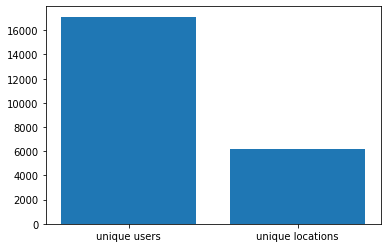

In [16]:
x = np.array(["unique users", "unique locations"])
y = np.array([len(df['user_id'].unique()),len(df['user_location'].unique())])
plt.bar(x,y)

## Top 20 active locations (country,state and city wise) on twitter

In [17]:
top_20_active_locations = df.groupby(by='user_location').count().sort_values(by='user_id', ascending=False)[0:20]['user_id']

<AxesSubplot:xlabel='user_location'>

/home/harsh/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/harsh/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/harsh/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/harsh/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3379 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/harsh/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/harsh/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3

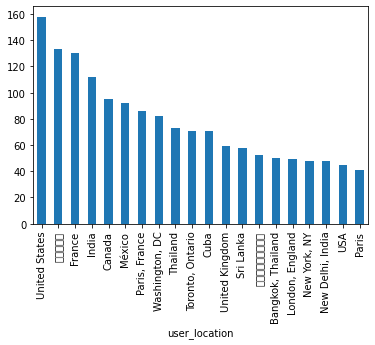

In [18]:
top_20_active_locations.plot.bar()

## Top 20 Langauages used on Twitter across globe

In [19]:
top_20_lang_used_on_twitter = df.groupby(by='tweet_lang').count().sort_values(by='user_id', ascending=False)[0:20]['user_id']

<AxesSubplot:xlabel='tweet_lang'>

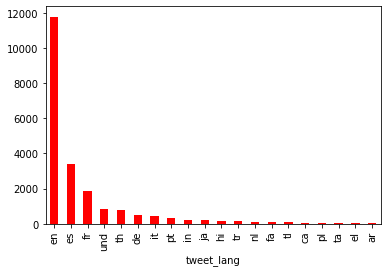

In [20]:
top_20_lang_used_on_twitter.plot.bar(color='red')

## Top 20 user names followed on twitter

In [21]:
top_20_followed_users = df.sort_values(by='user_followers_count', ascending=False)[0:20][['user_name','user_followers_count']]

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

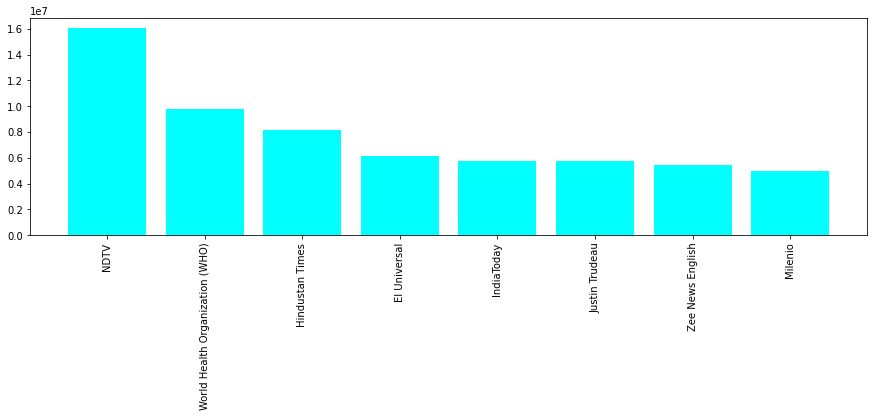

In [22]:
plt.figure(figsize=(15,4))
plt.bar(top_20_followed_users['user_name'],top_20_followed_users['user_followers_count'],color='cyan')
plt.xticks(rotation=90)